<a href="https://colab.research.google.com/github/riyapalesha/SPPU-Data_Science_And_Big_Data_Analytics_Lab/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [ ]:
# importing required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
orig_df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
orig_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df=orig_df.copy()

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
missing_values_count=df.isna().sum()
missing_values_count

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
df.shape

(506, 14)

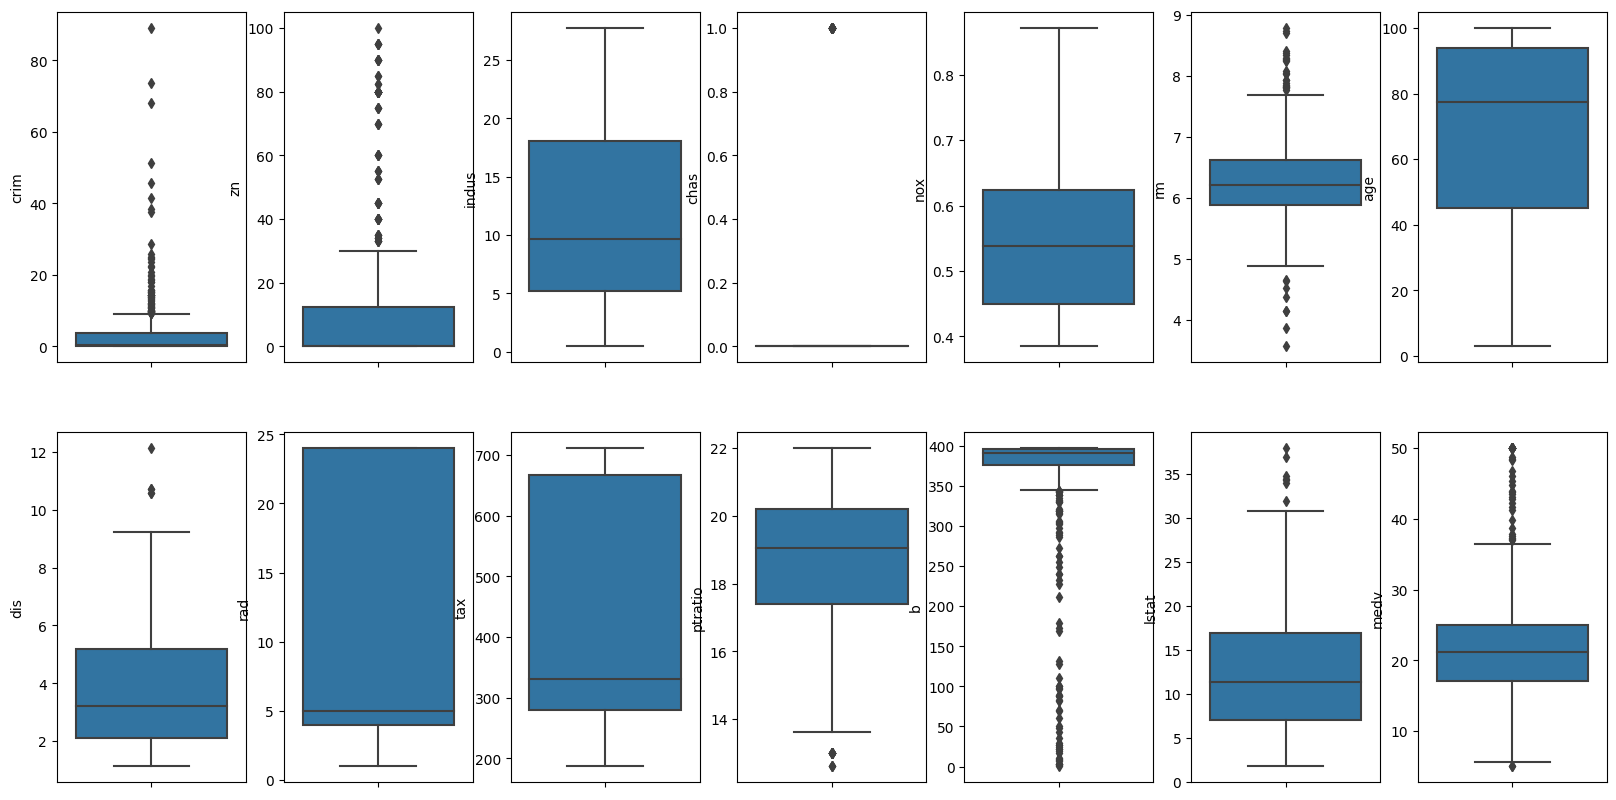

In [ ]:
# Displaying boxplots for each column in the dataframe
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
ax=ax.flatten()
index=0
for col,values in df.items():
  sns.boxplot(y=col, data=df, ax=ax[index])
  index=index+1;


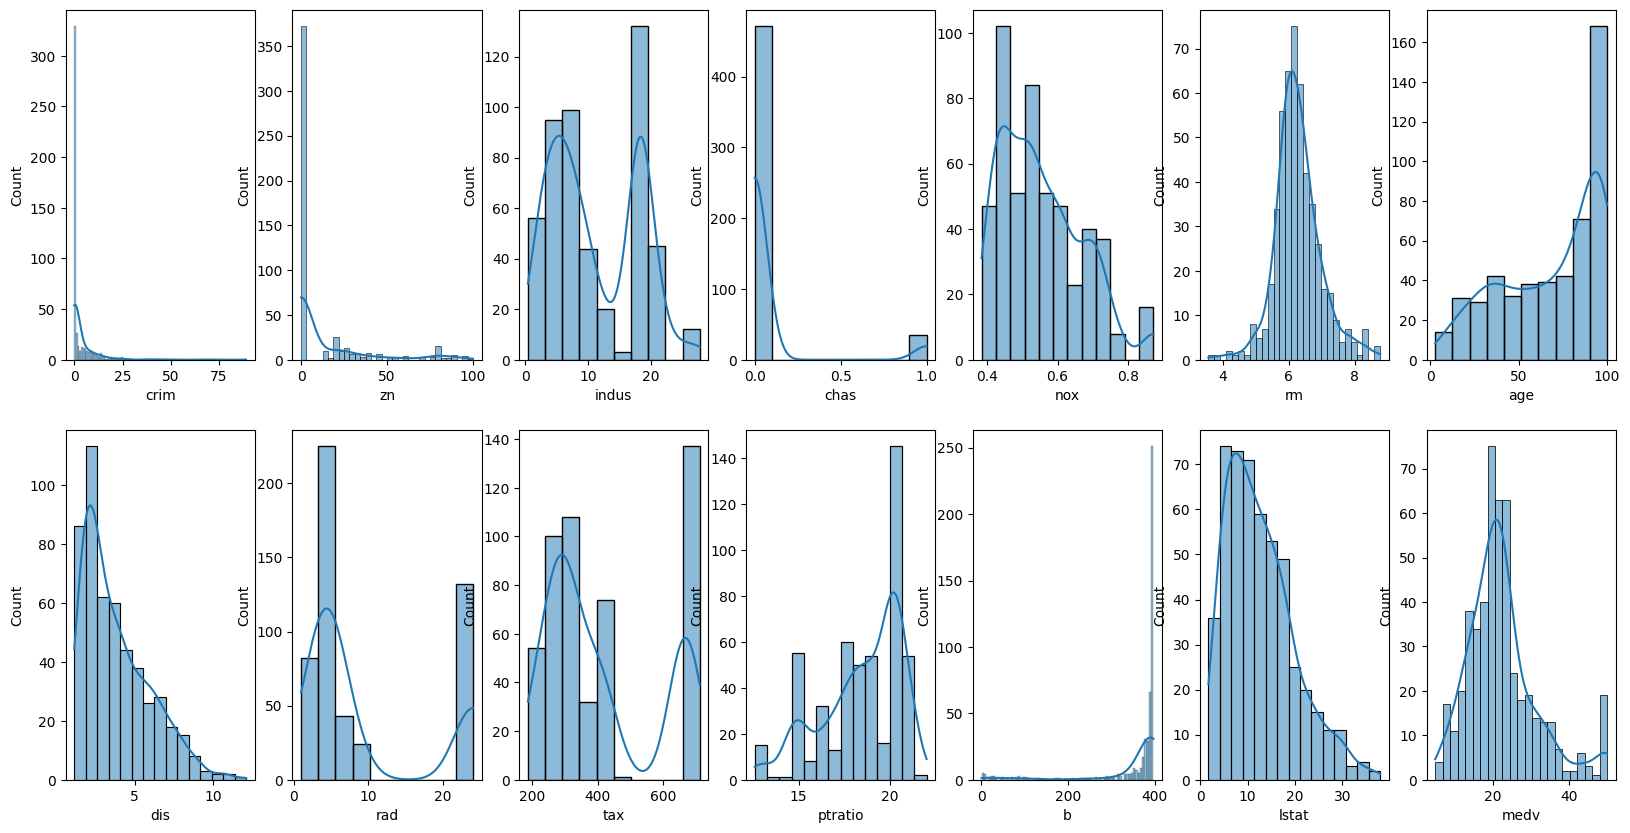

In [ ]:
fig, ax=plt.subplots(nrows=2, ncols=7, figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
  sns.histplot(value, ax=ax[index], kde=True)
  index=index+1

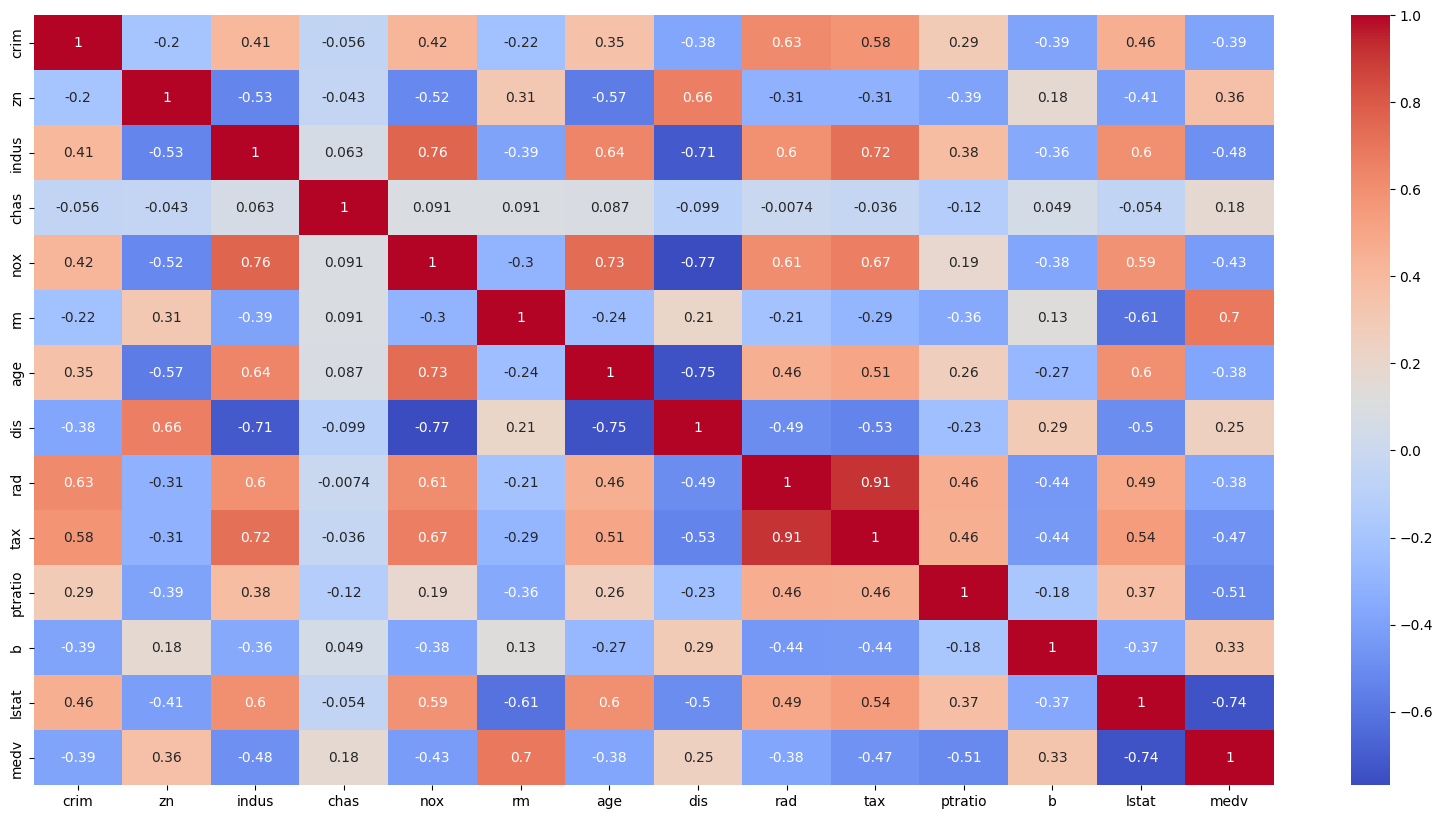

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

corr(): This is a built-in method in pandas DataFrame that calculates the pairwise correlation between columns. By default, it computes the Pearson correlation coefficient, which measures the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative linear relationship, 0 indicates no linear relationship, and 1 indicates a strong positive linear relationship.


In [ ]:
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

<Axes: xlabel='medv', ylabel='lstat'>

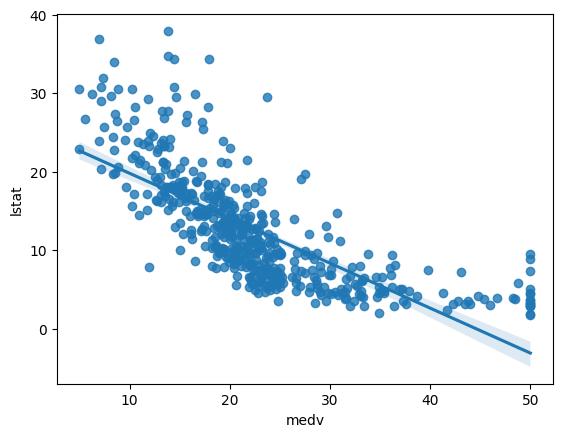

In [ ]:
sns.regplot(x=df["medv"], y=df["lstat"])

<Axes: xlabel='medv', ylabel='rm'>

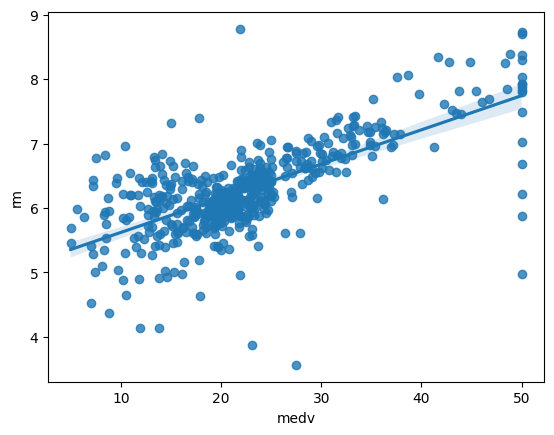

In [ ]:
sns.regplot(x=df["medv"], y=df["rm"])

<Axes: xlabel='rad', ylabel='tax'>

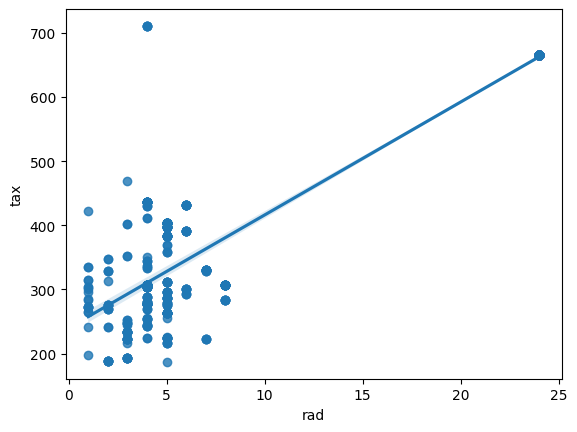

In [ ]:
sns.regplot(x=df["rad"], y=df["tax"])

In [ ]:
X=df.drop(columns=["medv","rad"], axis=1)
Y=df["medv"]

predict(): This is a method specific to machine learning models that allows you to make predictions on new/unseen data. It takes the test data as input and returns the predicted values

fit(): This is a method specific to machine learning models that is used to train the model using the provided training data. During the training process, the model learns the underlying patterns and relationships between the input features (x_train) and the target variable (y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def accuracy(y_test, y_pred_test, y_train, y_pred_train):

  mse=mean_squared_error(y_test, y_pred_test)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred_test)
  r2_test=r2_score(y_test, y_pred_test)
  r2_train=r2_score(y_train, y_pred_train)

  print()
  print("RESULT")
  print("Mean Squared Error = ",mse)
  print("Root Mean Squared Error = ",rmse)
  print("Mean Absolute Error = ",mae)
  print()
  print("R2 Score = ",r2_test)
  print("R2 Score = ",r2_train)
  print("A similar R2 score between training and testing data indicates good generalization")
  print("while a significantly lower R2 score for testing data compared to training data may indicate overfitting")

In [ ]:
from sklearn.model_selection import train_test_split
def train(model, X, Y):
  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33, random_state=42)
  model.fit(x_train,y_train)
  predicted_price_y_test=model.predict(x_test)
  predicted_price_y_train=model.predict(x_train)

  predicted_dataframe=pd.DataFrame({"Predicted Prices":predicted_price_y_test, "Actual Prices":y_test})
  print(predicted_dataframe)

  accuracy(y_test, predicted_price_y_test, y_train, predicted_price_y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
train(model, X, Y)

     Predicted Prices  Actual Prices
173         28.401724           23.6
274         36.474985           32.4
491         19.090180           13.6
72          25.643159           22.8
452         18.056628           16.1
..                ...            ...
110         22.093520           21.7
321         24.990945           23.1
265         26.901172           22.8
29          21.293086           21.0
262         40.099567           48.8

[167 rows x 2 columns]

RESULT
Mean Squared Error =  22.339013815006723
Root Mean Squared Error =  4.72641659346769
Mean Absolute Error =  3.275010643648494

R2 Score =  0.7048169381846436
R2 Score =  0.7330180989316861
A similar R2 score between training and testing data indicates good generalization
while a significantly lower R2 score for testing data compared to training data may indicate overfitting


1. R-squared (R2) score:
R2 score measures the proportion of the variance in the dependent variable that is explained by the independent variables. It indicates how well the model fits the data. The R2 score ranges from 0 to 1, where a score closer to 1 indicates a better fit.

2. Mean squared error (MSE):
MSE measures the average squared difference between the predicted and true values. It quantifies the overall quality of the predictions, with lower values indicating better performance.

3. Root mean squared error (RMSE):
RMSE is the square root of the MSE. It represents the average magnitude of the prediction errors in the same unit as the target variable. Lower RMSE values indicate better accuracy.

4. Mean absolute error (MAE):
It measures the average absolute difference between the predicted values and the true values.It measures the absolute deviation between predicted and true values, without considering the direction of the errors.